In [6]:
import tarfile
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

#problem 1: train-test
def train_test(df):
    SEED = 1234
    df_train, df_test = train_test_split(df,random_state=SEED)
    return df_train, df_test

#problem 2: countVectorizer
def count_vectorizer(df_train, df_test):
    cv = CountVectorizer()
    X_train = cv.fit_transform(df_train['Content'])
    X_test = cv.transform(df_test['Content'])
    return X_train, X_test

def count_bernoulliNB(X_train, X_test, y_train, y_test, le):
    bnb = BernoulliNB()
    bnb.fit(X_train, y_train)
    y_pred_bnb = bnb.predict(X_test)
    
    acc_bnb = accuracy_score(y_test, y_pred_bnb)
    
    y_test_inv = le.inverse_transform(y_test)
    y_pred_bnb_inv = le.inverse_transform(y_pred_bnb)
    tp = ((y_test_inv == 'Ham') & (y_pred_bnb_inv == 'Ham')).sum()
    fp = ((y_test_inv == 'Spam') & (y_pred_bnb_inv == 'Ham')).sum()
    fn = ((y_test_inv == 'Ham') & (y_pred_bnb_inv == 'Spam')).sum()
    tn = ((y_test_inv == 'Spam') & (y_pred_bnb_inv == 'Spam')).sum()
    acc = (tp + tn) / (tp + fp + tn + fn)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    
    return acc, precision, recall, y_pred_bnb

def count_multinomialNB(X_train, X_test, y_train, y_test, le):
    mnb = MultinomialNB()
    mnb.fit(X_train, y_train)
    y_pred_mnb = mnb.predict(X_test)
    
    acc_mnb = accuracy_score(y_test, y_pred_mnb)
    
    y_test_inv = le.inverse_transform(y_test)
    y_pred_mnb_inv = le.inverse_transform(y_pred_mnb)
    tp = ((y_test_inv == 'Ham') & (y_pred_mnb_inv == 'Ham')).sum()
    fp = ((y_test_inv == 'Spam') & (y_pred_mnb_inv == 'Ham')).sum()
    fn = ((y_test_inv == 'Ham') & (y_pred_mnb_inv == 'Spam')).sum()
    tn = ((y_test_inv == 'Spam') & (y_pred_mnb_inv == 'Spam')).sum()
    acc = (tp + tn) / (tp + fp + tn + fn)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    
    return acc, precision, recall, y_pred_mnb





In [7]:
easy_ham = []
hard_ham = []
spam = []

with tarfile.open("20021010_spam.tar.bz2", "r:bz2") as tar:
    for tarinfo in tar:
        if tarinfo.isreg():
            with tar.extractfile(tarinfo) as file_content:
                content_bytes = file_content.read()
                content_utf8 = content_bytes.decode('utf-8', errors='ignore')
            row = {'Name': tarinfo.name, 'Content': content_utf8, 'Type': 'Spam'}
            spam.append(row)

with tarfile.open("20021010_easy_ham.tar.bz2", "r:bz2") as tar:
    for tarinfo in tar:
        if tarinfo.isreg():
            with tar.extractfile(tarinfo) as file_content:
                content_bytes = file_content.read()
                content_utf8 = content_bytes.decode('utf-8', errors='ignore')
            row = {'Name': tarinfo.name, 'Content': content_utf8, 'Type': 'Ham'}
            easy_ham.append(row)

with tarfile.open("20021010_hard_ham.tar.bz2", "r:bz2") as tar:
    for tarinfo in tar:
        if tarinfo.isreg():
            with tar.extractfile(tarinfo) as file_content:
                content_bytes = file_content.read()
                content_utf8 = content_bytes.decode('utf-8', errors='ignore')
            row = {'Name': tarinfo.name, 'Content': content_utf8, 'Type': 'Ham'}
            hard_ham.append(row)

df_spam = pd.DataFrame(spam)
df_easy_ham = pd.DataFrame(easy_ham)
df_hard_ham = pd.DataFrame(hard_ham)

                                                Name  \
0         spam/0103.8c39bfed2079f865e9dfb75f4416a468   
1         spam/0107.f1d4194b57840ea6587b9a73ed88e075   
2         spam/0012.7bc8e619ad0264979edce15083e70a02   
3         spam/0114.c104ada3a249e1e1846c0cd156a303e9   
4         spam/0118.4be8b50c2a818c62b62e70c4b5456113   
...                                              ...   
3047  easy_ham/0995.9298a05fd3411fb40a7c3b9768b72438   
3048  easy_ham/0996.a6ea93af44bc21fb704aecfd1bc4d57a   
3049  easy_ham/0997.df0c214721243248b9421e3c0ba9e453   
3050  easy_ham/0999.693cdb369d548fedfd9ad794b8b6b882   
3051  easy_ham/1000.348e8a82897b05d584de019f4dd5c7e2   

                                                Content  Type  
0     From george@vccomputers.ie  Mon Aug 26 17:49:4...  Spam  
1     From gwfqjulie@msn.com  Mon Aug 26 21:37:20 20...  Spam  
2     From simply-amateur-zzzz=example.com@free4porn...  Spam  
3     From thisisagreatfreepornmovie@framesetup.com ...  Spam  
4     F

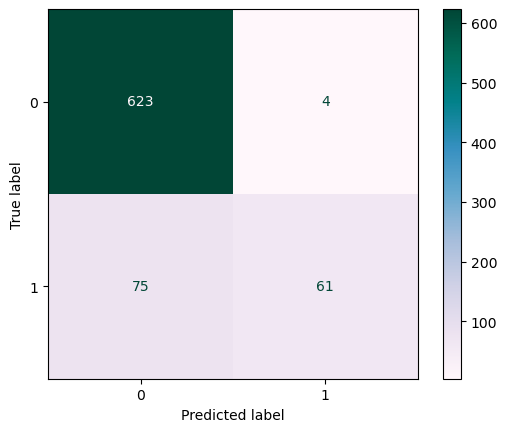

MultinomialNB Accuracy: 0.9659239842726082
MultinomialNB Precision: 0.9601837672281777
MultinomialNB Recall: 1.0
MultinomialNB Confusion Matrix:


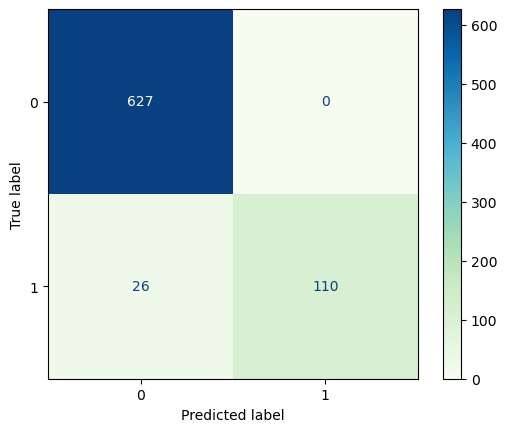

In [10]:
#Easy and Spam

df = pd.concat([df_spam, df_easy_ham], ignore_index=True)
df_train, df_test = train_test(df)
df_train.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)
df_train['Type'].value_counts()

X_train, X_test = count_vectorizer(df_train,df_test)
le = LabelEncoder()
y_train = le.fit_transform(df_train['Type'])
y_test = le.transform(df_test['Type'])

#Bernoulli
bernoulli_acc, bernoulli_precision, bernoulli_recall, y_pred_bnb = count_bernoulliNB(X_train, X_test, y_train, y_test, le)

print("BernoulliNB Accuracy:", bernoulli_acc)
print("BernoulliNB Precision:", bernoulli_precision)
print("BernoulliNB Recall:", bernoulli_recall)

cm_bnb = metrics.confusion_matrix(y_test, y_pred_bnb)

print("BernoulliNB Confusion Matrix:")
cm_display = metrics.ConfusionMatrixDisplay(cm_bnb, display_labels = [0, 1])
cm_display.plot(cmap=plt.cm. PuBuGn)
plt.show()

#MultinomialNB

multi_acc, multi_precision, multi_recall, y_pred_mnb = count_multinomialNB(X_train, X_test, y_train, y_test, le)

print("MultinomialNB Accuracy:", multi_acc)
print("MultinomialNB Precision:", multi_precision)
print("MultinomialNB Recall:", multi_recall)

cm_mnb = metrics.confusion_matrix(y_test, y_pred_mnb)

print("MultinomialNB Confusion Matrix:")
cm_display = metrics.ConfusionMatrixDisplay(cm_mnb, display_labels = [0, 1])
cm_display.plot(cmap=plt.cm.GnBu)
plt.show()


BernoulliNB Accuracy: 0.8670212765957447
BernoulliNB Precision: 0.9444444444444444
BernoulliNB Recall: 0.5964912280701754
BernoulliNB Confusion Matrix:


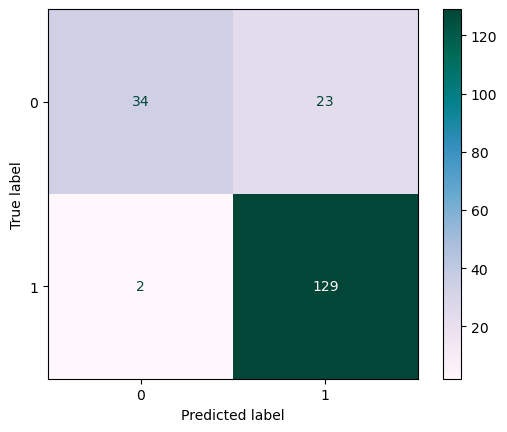

MultinomialNB Accuracy: 0.9361702127659575
MultinomialNB Precision: 0.8947368421052632
MultinomialNB Recall: 0.8947368421052632
MultinomialNB Confusion Matrix:


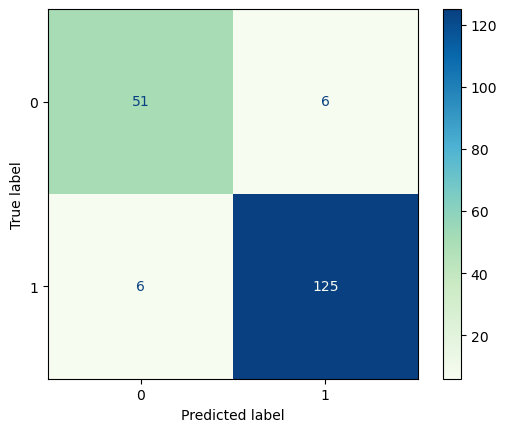

In [9]:
#Hard and Spam

df = pd.concat([df_spam, df_hard_ham], ignore_index=True)

df_train, df_test = train_test(df)
df_train.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)
df_train['Type'].value_counts()

X_train, X_test = count_vectorizer(df_train,df_test)
le = LabelEncoder()
y_train = le.fit_transform(df_train['Type'])
y_test = le.transform(df_test['Type'])

#Bernoulli
bernoulli_acc, bernoulli_precision, bernoulli_recall, y_pred_bnb = count_bernoulliNB(X_train, X_test, y_train, y_test, le)

print("BernoulliNB Accuracy:", bernoulli_acc)
print("BernoulliNB Precision:", bernoulli_precision)
print("BernoulliNB Recall:", bernoulli_recall)

cm_bnb = metrics.confusion_matrix(y_test, y_pred_bnb)

print("BernoulliNB Confusion Matrix:")
cm_display = metrics.ConfusionMatrixDisplay(cm_bnb, display_labels = [0, 1])
cm_display.plot(cmap=plt.cm. PuBuGn)
plt.show()

#MultinomialNB

multi_acc, multi_precision, multi_recall, y_pred_mnb = count_multinomialNB(X_train, X_test, y_train, y_test, le)

print("MultinomialNB Accuracy:", multi_acc)
print("MultinomialNB Precision:", multi_precision)
print("MultinomialNB Recall:", multi_recall)

cm_mnb = metrics.confusion_matrix(y_test, y_pred_mnb)

print("MultinomialNB Confusion Matrix:")
cm_display = metrics.ConfusionMatrixDisplay(cm_mnb, display_labels = [0, 1])
cm_display.plot(cmap=plt.cm.GnBu)
plt.show()
